# **Data Analysis Project: Bike Sharing**
- **Name:** Putri Shanty Yanunta Yulista
- **Email:** putrishantyy29@gmail.com
- **ID Dicoding:** putrishantyy29

## **Defining Business Questions**
Begin by identifying key business questions or objectives that the analysis aims to address. These questions will guide the rest of the project and help focus the analysis on relevant insights.

1. What are the overall trends in bike sharing counts over the two-year period?
2. How does the distribution of bike sharing vary between weekdays, workingdays and holidays?
3. What is the impact of weather conditions on bike sharing?
4. What proportion of daily bike sharing are from registered users versus casual users?
5. Is there a noticeable impact of temperature, atemp, humidity and windspeed on bike sharing?

## Importing All Packages/Libraries Used
Start by importing all necessary packages and libraries required for data analysis and visualization. This step ensures that the necessary tools are readily available for data manipulation and exploration.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

## Data Wrangling
Data wrangling involves the process of cleaning, transforming, and preparing the raw data for analysis. This step ensures that the data is accurate, consistent, and formatted correctly, enabling meaningful insights to be extracted during the analysis phase.

### 1. Gathering Data
Collect the necessary datasets for the analysis. In this project, the bike sharing dataset consists of day.csv files.

In [2]:
day_df = pd.read_csv("/Users/putri/OneDrive/Documents/BANGKIT 2024/submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2. Assessing Data
Evaluate the datasets for quality and tidiness issues, such as missing values, duplicates, or inconsistencies.

- **Check Data Type**

Begin by examining the data types of each column in the datasets.

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


The 'dteday' currently stored as an object data type, it should be convert to a datetime data type. Columns like 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' to convert into categorical data type to allow for better analysis.

- **Check missing values**

Evaluate the dataset for missing values across variables.

In [36]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The dataset is complete and does not contain any missing values in any of the columns.

- **Check duplicated data**

Look for duplicate entries within the dataset to identify any instances of replicated observations.

In [37]:
print("Total duplicated data: ", day_df.duplicated().sum())

Total duplicated data:  0


There are no duplicated data entries in the dataset, which means that each row in the dataset is unique.

- **Check statistics parameters**

Calculate and review key statistical parameters, such as mean, median, standard deviation, minimum, and maximum values, for numerical variables in the dataset.

In [38]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The statistics will help in understanding the overall characteristics and range of values present in the dataset.

### 3. Cleaning Data
Address any identified issues through cleaning operations to ensure the datasets are ready for analysis.

- **Convert data type and values**

Convert data types as needed to align with analysis requirements and improve computational efficiency.

In [39]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert the 'dteday' column from object type to datetime type

In [40]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['yr'] = day_df['dteday'].dt.year
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df['weekday'] = day_df['dteday'].dt.day_name()
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert the values of the data.

In [41]:
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert categorical variables to categorical data type.

## Exploratory Data Analysis (EDA)
Perform exploratory data analysis (EDA) to understand the structure, distributions, and relationships within the datasets. This step involves summarizing key statistics, identifying patterns, and exploring potential correlations between variables.

### Explore day_df Data

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [43]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,August,0.0,Monday,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- **Explore bike sharing count**

This step aims to gain insights into general patterns and potential anomalies in the data. 

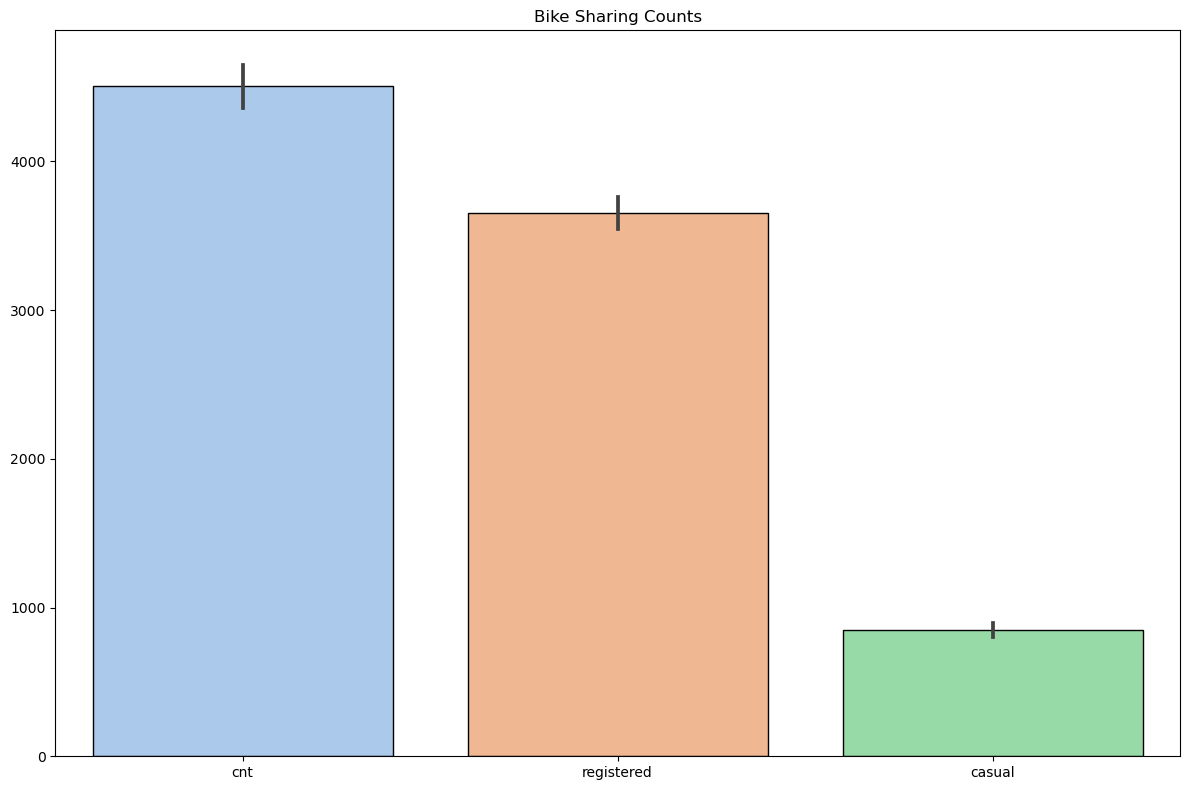

In [44]:
plt.figure(figsize=(12, 8))

sns.barplot(data=day_df[['cnt', 'registered', 'casual']], palette='pastel', edgecolor='black')
plt.title("Bike Sharing Counts")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

The count of registered users are higher than casual users.

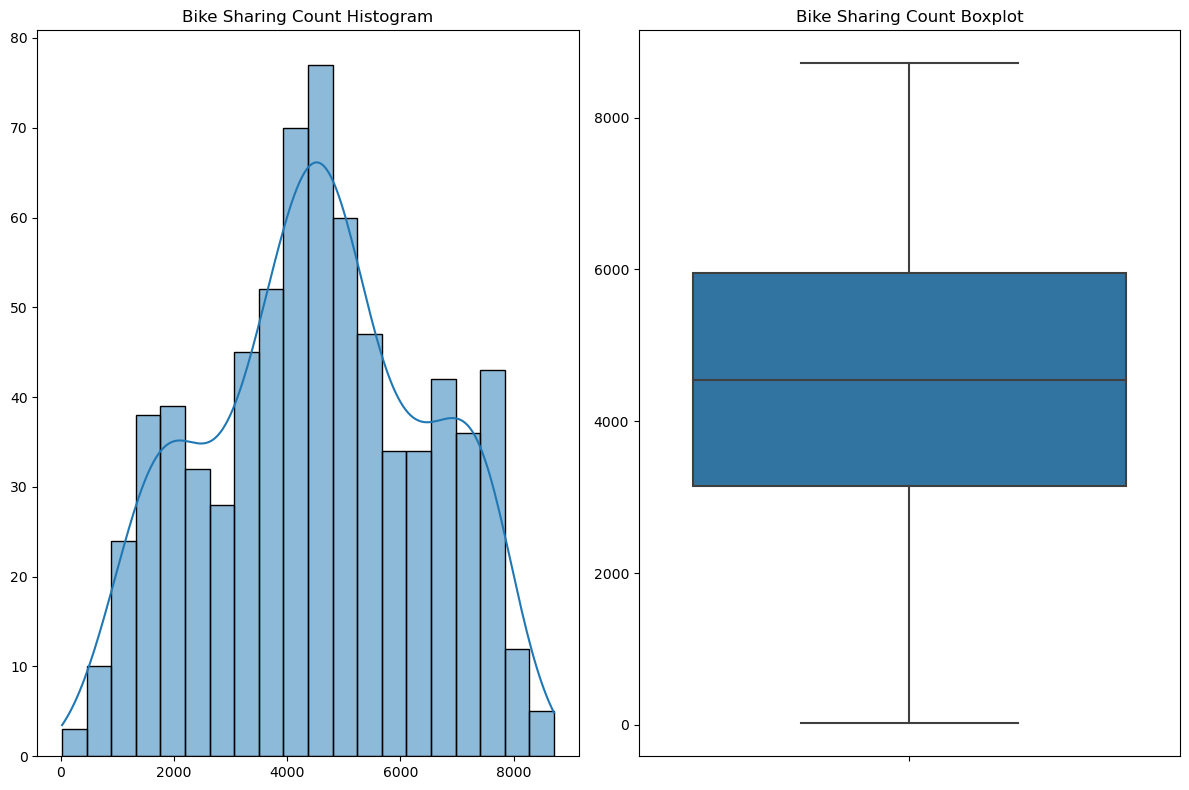

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

sns.histplot(day_df['cnt'], kde=True, bins=20, ax = axs[0])
axs[0].set_title("Bike Sharing Count Histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=day_df['cnt'], ax = axs[1])
axs[1].set_title("Bike Sharing Count Boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Histogram and Boxplot of Bike Sharing Count:**

The histogram shows a right-skewed distribution and the boxplot confirms the right-skewness observed in the histogram. The data shows that most days have a moderate number of bike rides (between 2000 and 6000). There are a few outliers on both the lower and higher ends, indicating a small number of days with significantly lower or higher bike sharing counts compared to the majority.

- **Explore the distribution patterns of the weather variables**

This step aims to provide an initial understanding of the distribution and characteristics of weather conditions captured in the dataset, laying the foundation for further exploration and analysis.

In [46]:
float_var = ["temp", "atemp", "hum", "windspeed"]
float_df = day_df[float_var]
float_df.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


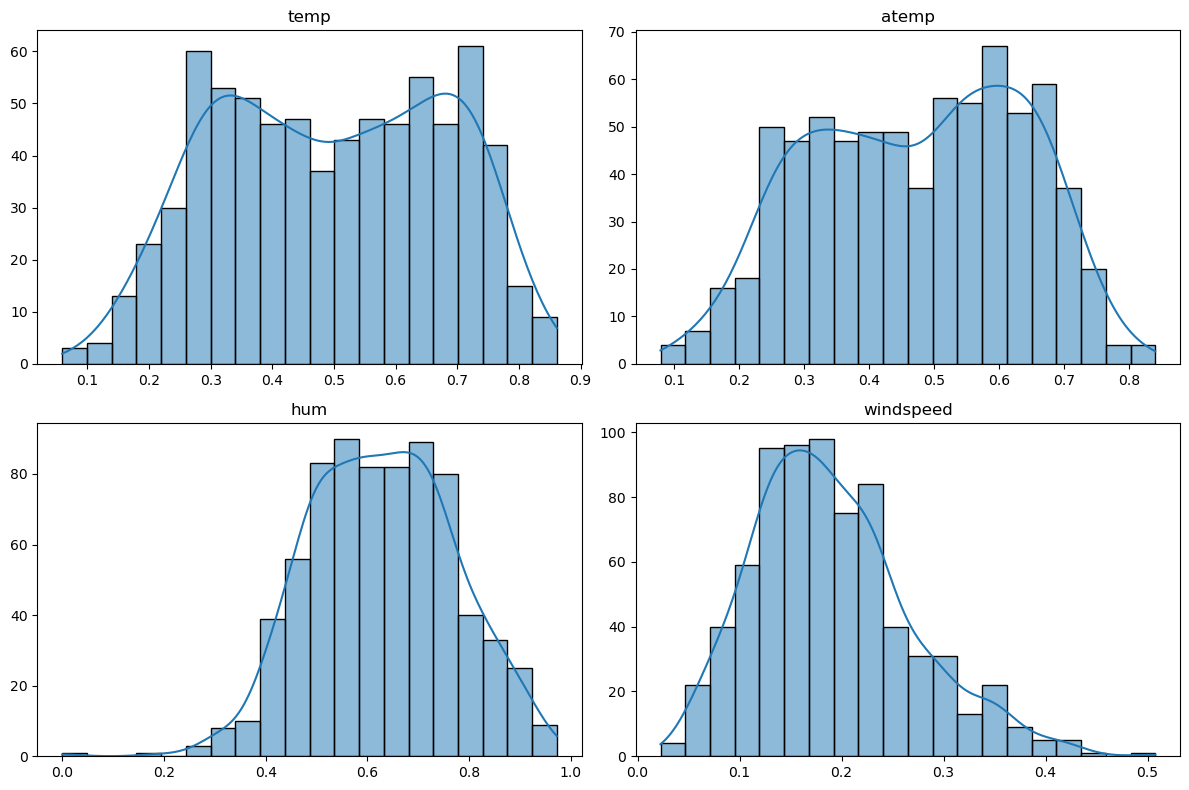

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.ravel()

for i, ax in enumerate(axs):
    sns.histplot(float_df[float_var[i]], ax=ax, kde=True, bins=20, edgecolor='black')
    ax.set_title(float_var[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.tight_layout()
plt.show()

**Histogram of the weather variables:**
- Temperature values indicates a normal distribution.
- Apparent temperature variable shows a skewed distribution meaning that the values are not evenly distributed and are concentrated towards either the higher or lower end of the scale, influenced by certain weather conditions or factors
- Humidity are relatively evenly distributed across the range, but there is a tendency towards higher humidity levels.
- For windspeed indicates a skewed distribution, lower windspeeds are more common, while higher windspeeds occur less frequently

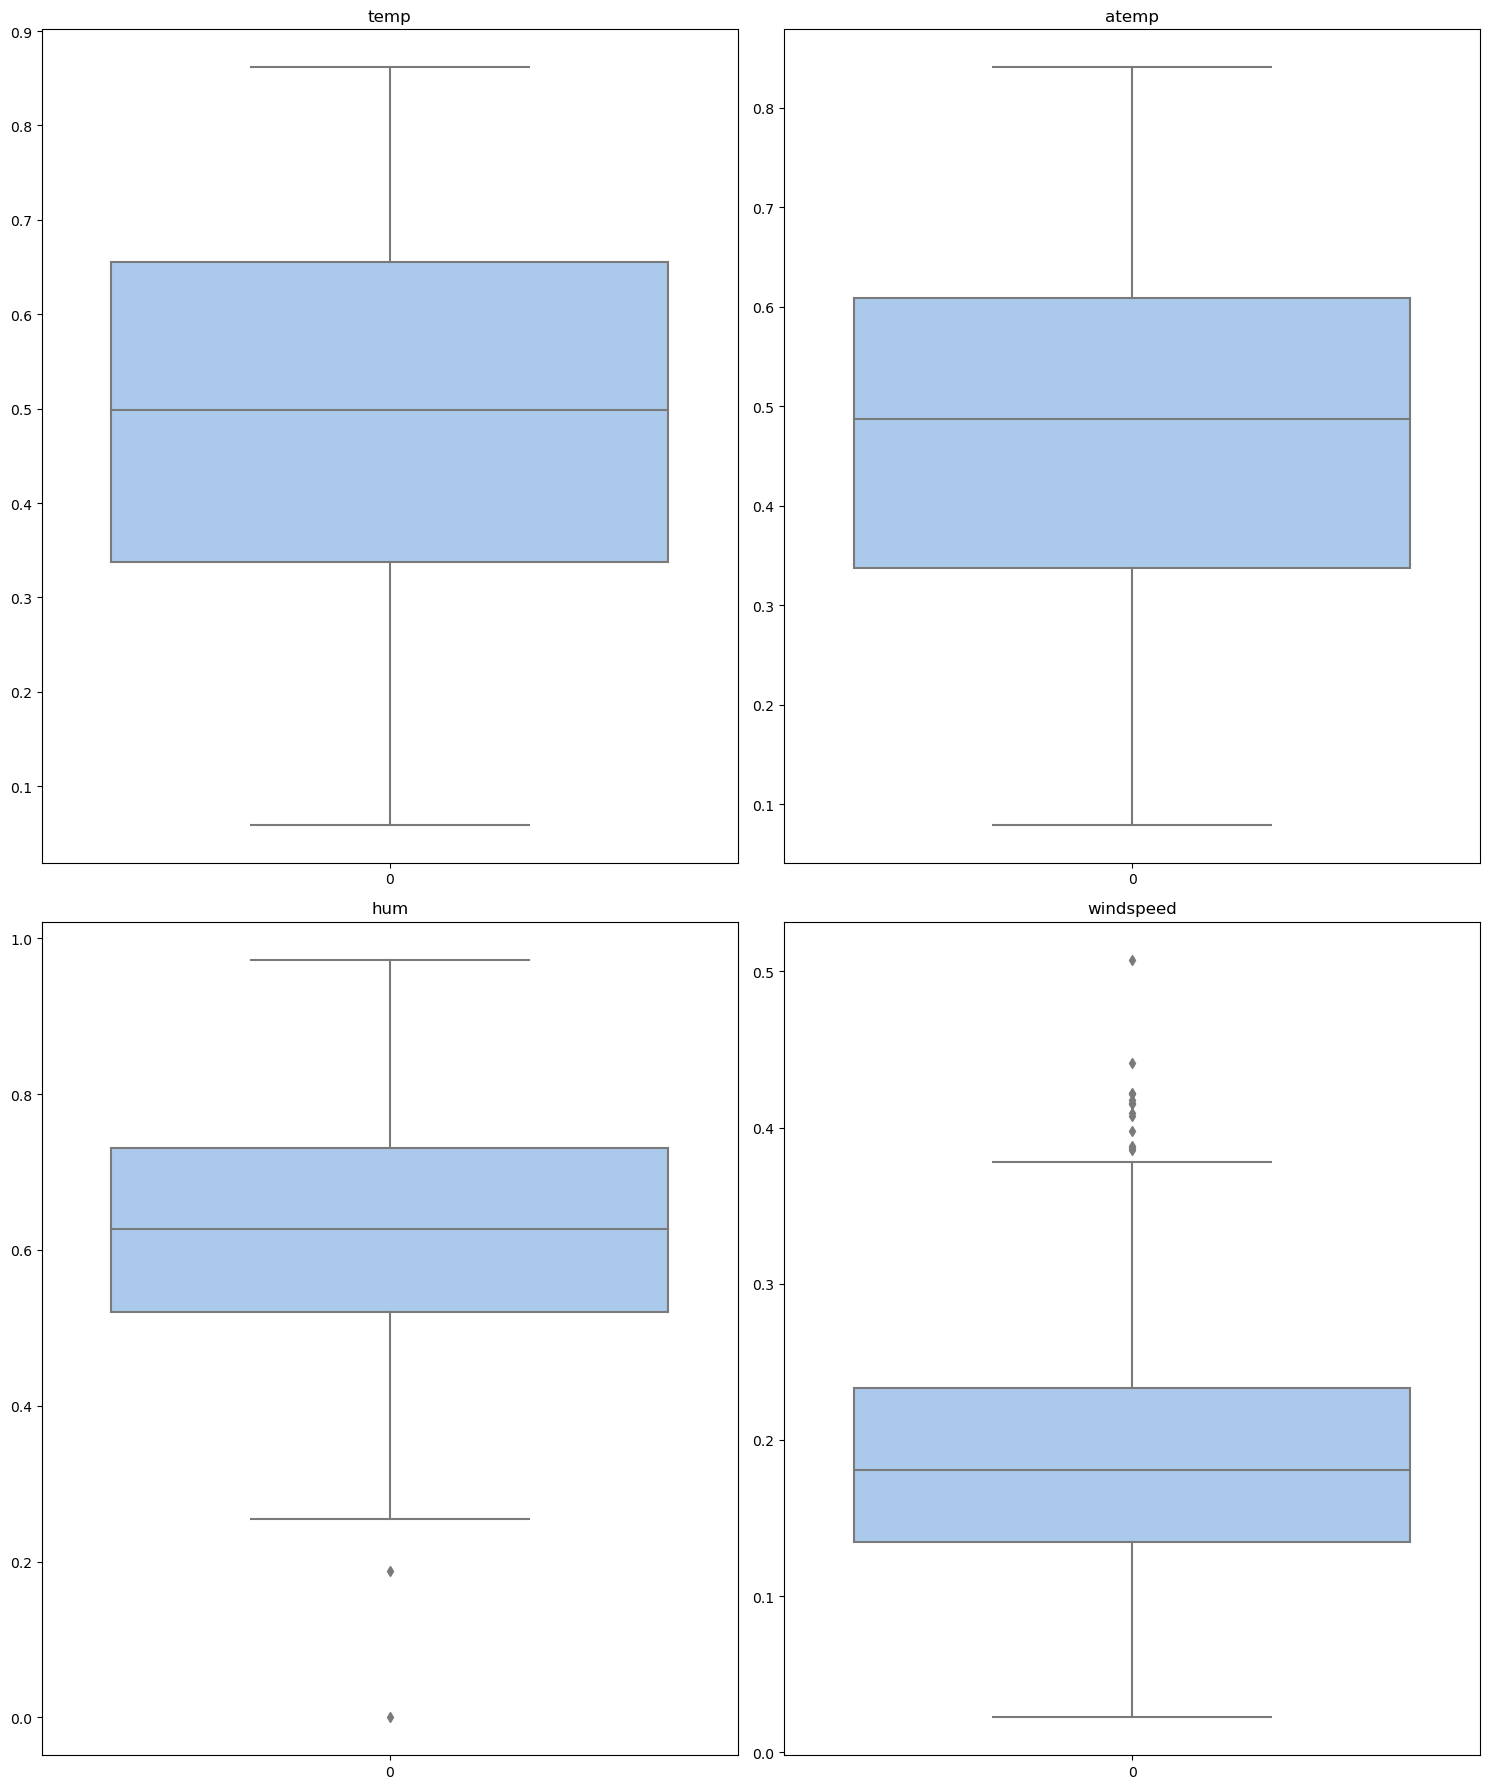

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15, 18))

axs = axs.ravel()

for i, ax in enumerate(axs):
    sns.boxplot(float_df[float_var[i]], ax=ax, palette='pastel', orient="v")
    ax.set_title(float_var[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.tight_layout()
plt.show()

**Boxplot of the weather variables:**

The boxplot shows that there are no visible outliers overall but there seem to be a few outliers at the higher end for atemp and windspeed.

- **Explore bike sharing counts by season**

This can provide insights into the distribution and proportions of different categories.

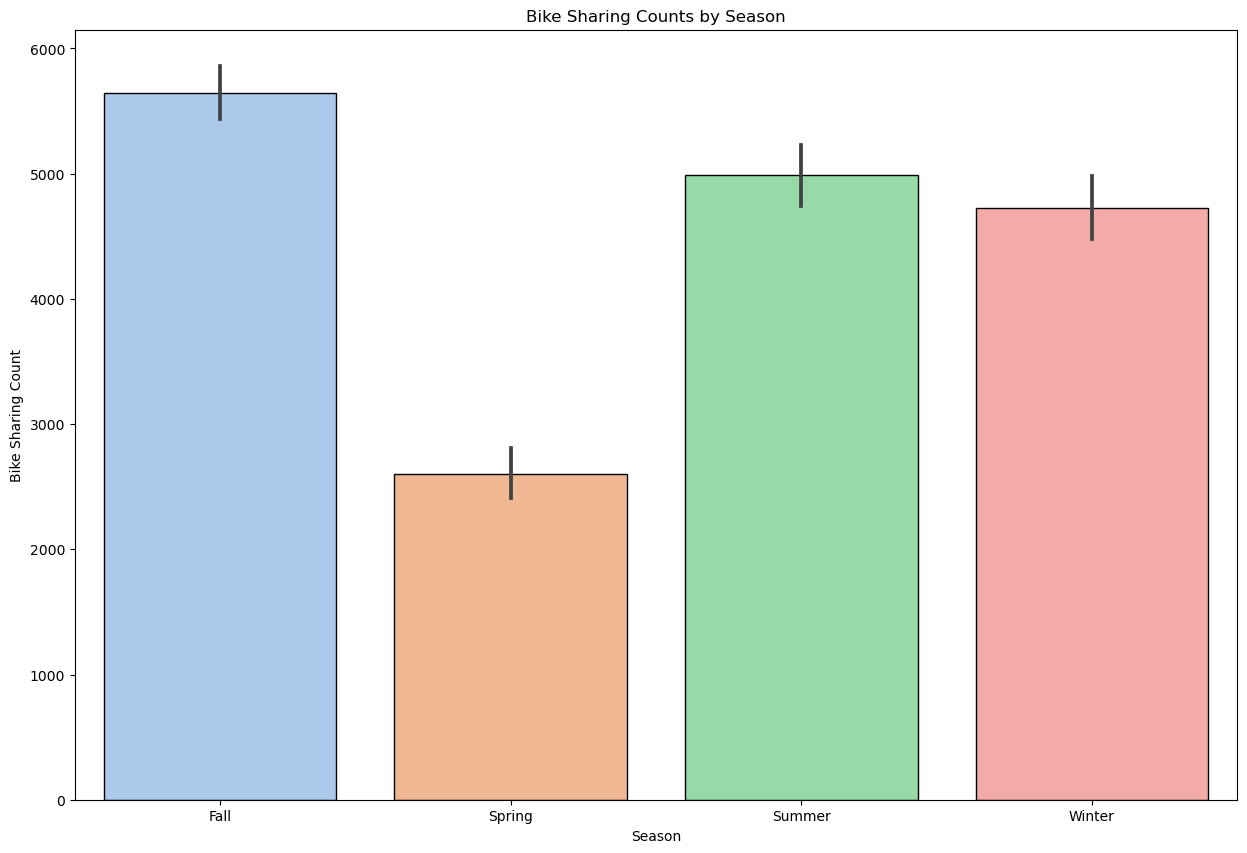

In [49]:
plt.figure(figsize=(15,10))

sns.barplot(x="season", y="cnt", data=day_df, palette='pastel', edgecolor='black')
plt.xlabel("Season")
plt.ylabel("Bike Sharing Count")
plt.title("Bike Sharing Counts by Season")

plt.show()

The count of bike sharing are highest in fall and lowest in spring. 

- **Explore bike sharing counts by year**

This can provide insights into the distribution and proportions of different categories.

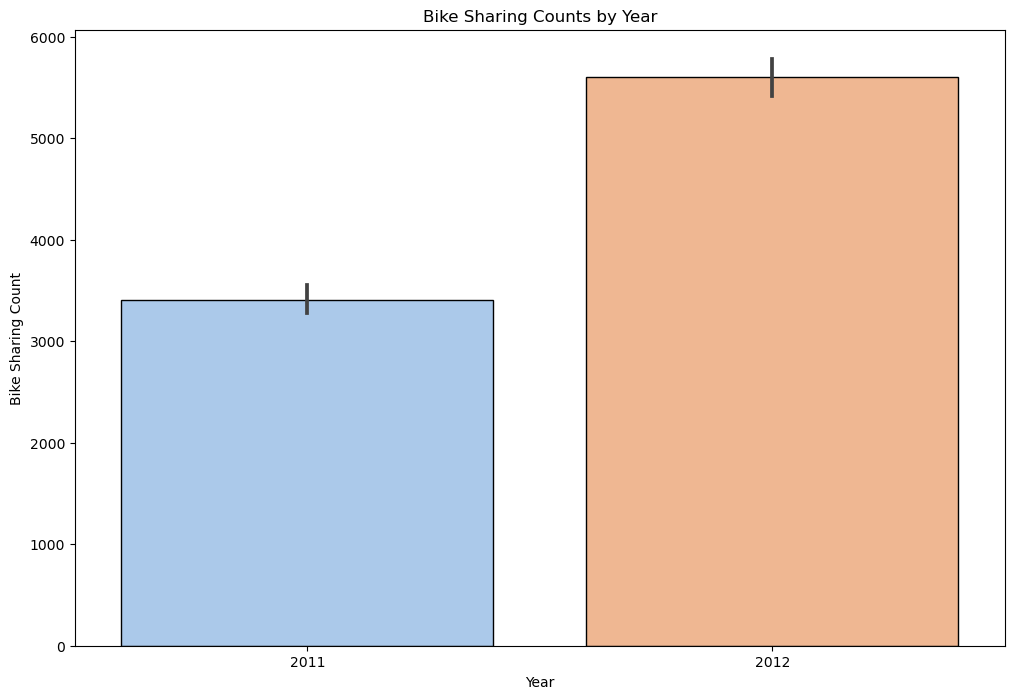

In [50]:
plt.figure(figsize=(12,8))

sns.barplot(x="yr", y="cnt", data=day_df, palette='pastel', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Bike Sharing Count")
plt.title("Bike Sharing Counts by Year")

plt.show()

The count of bike sharing are higher in 2012 than in 2011.

- **Explore bike sharing counts by months**

This can provide insights into the distribution and proportions of different categories.

In [51]:
monthly_users_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_users_df['mnth'] = monthly_users_df.index.strftime('%B')
monthly_users_df['yr'] = monthly_users_df.index.strftime('%Y')
monthly_users_df = monthly_users_df.reset_index(drop=True)
monthly_users_df.head()

,cnt,mnth,yr
0,38189,January,2011
1,48215,February,2011
2,64045,March,2011
3,94870,April,2011
4,135821,May,2011


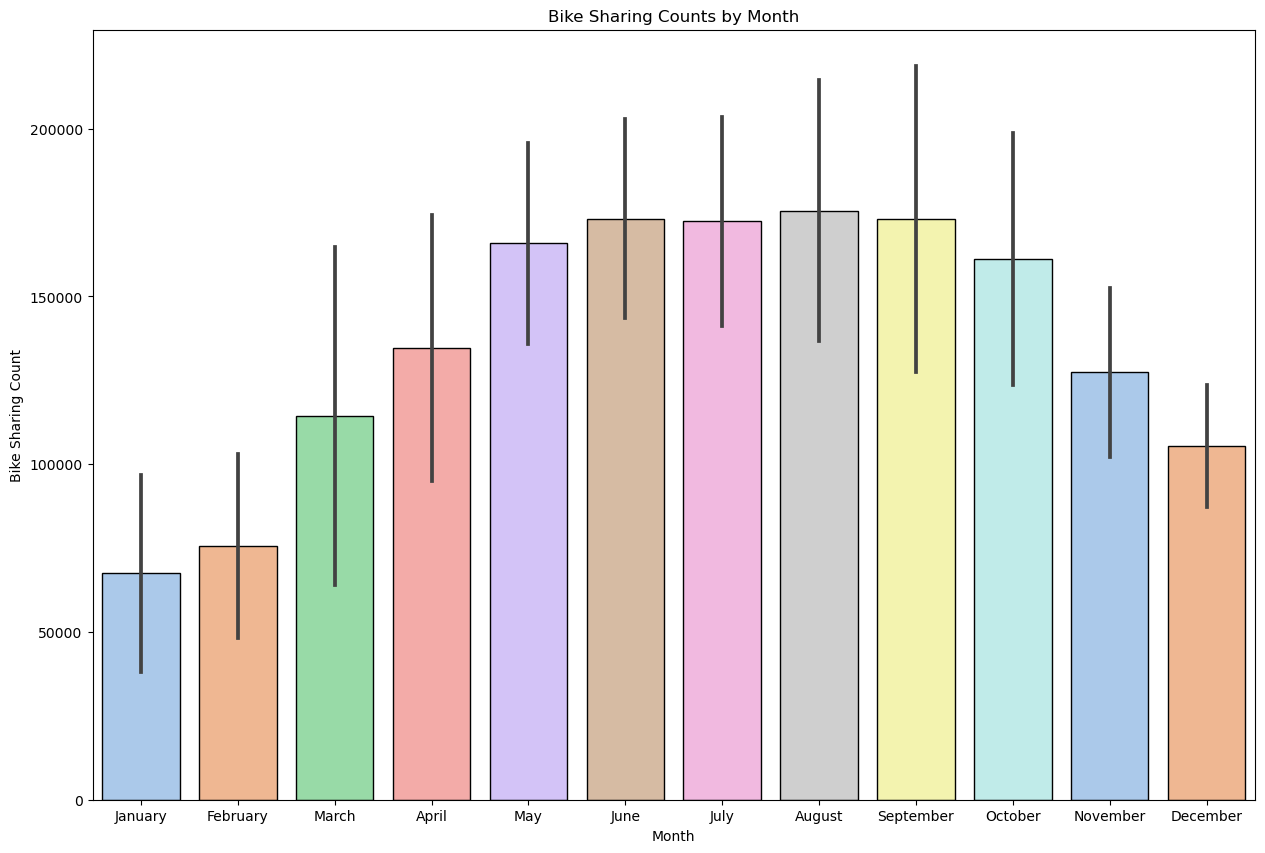

In [52]:
plt.figure(figsize=(15,10))

sns.barplot(x="mnth", y="cnt", data=monthly_users_df, palette='pastel', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Bike Sharing Count")
plt.title('Bike Sharing Counts by Month')

plt.show()

The inital count of bike sharing in the beginning of the year are at the lowest and increased in the middle of the year while decreased by the end year.

- **Explore bike sharing counts by weather situation**

This can provide insights into the distribution and proportions of different categories.

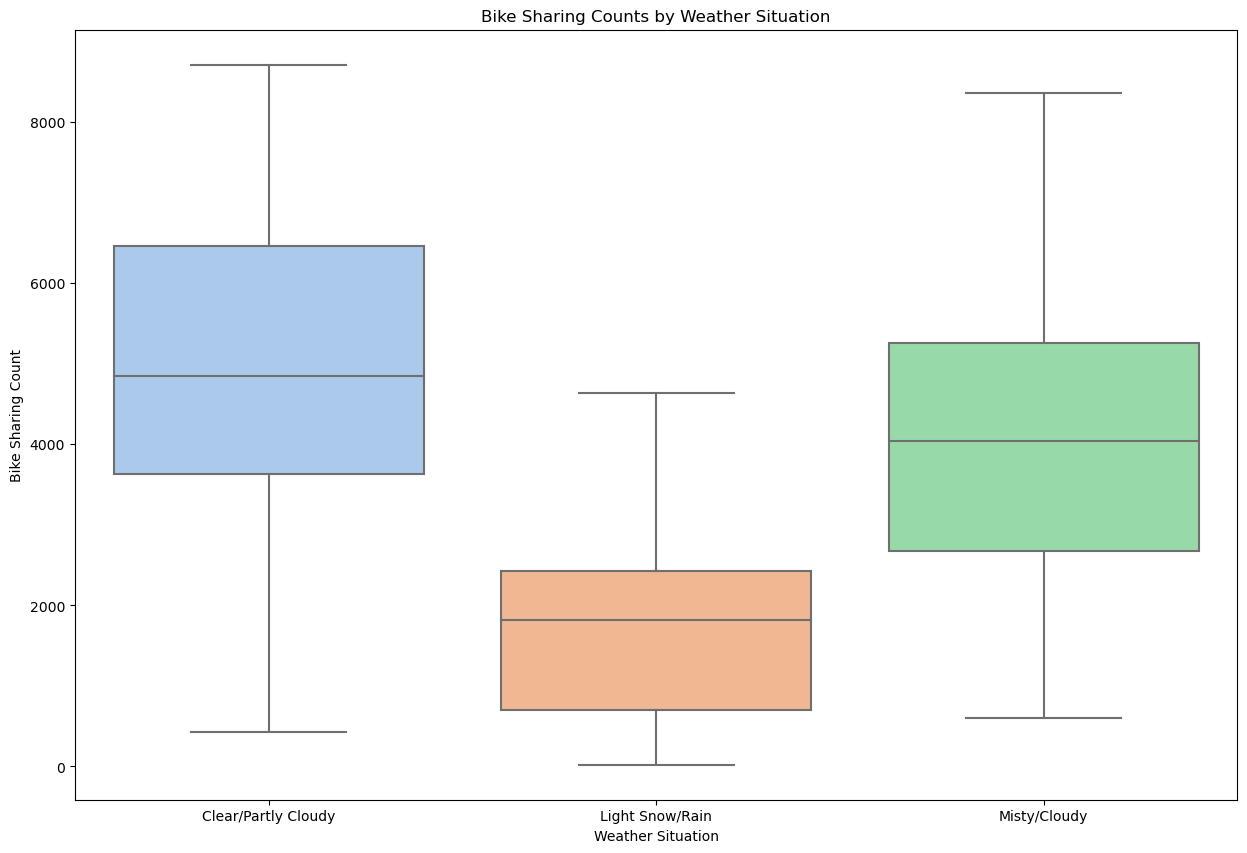

In [53]:
plt.figure(figsize=(15,10))

sns.boxplot(x="weathersit", y="cnt", data=day_df, palette='pastel')
plt.xlabel("Weather Situation")
plt.ylabel("Bike Sharing Count")
plt.title('Bike Sharing Counts by Weather Situation')

plt.show()

The count of bike sharing are highest in clear/partly cloudy and lowest in bad weather like rain and snow. 

- **Relation between variables**

This can help identify any patterns or correlations between variables.

Text(0.5, 1.0, 'Correlation Heatmap')

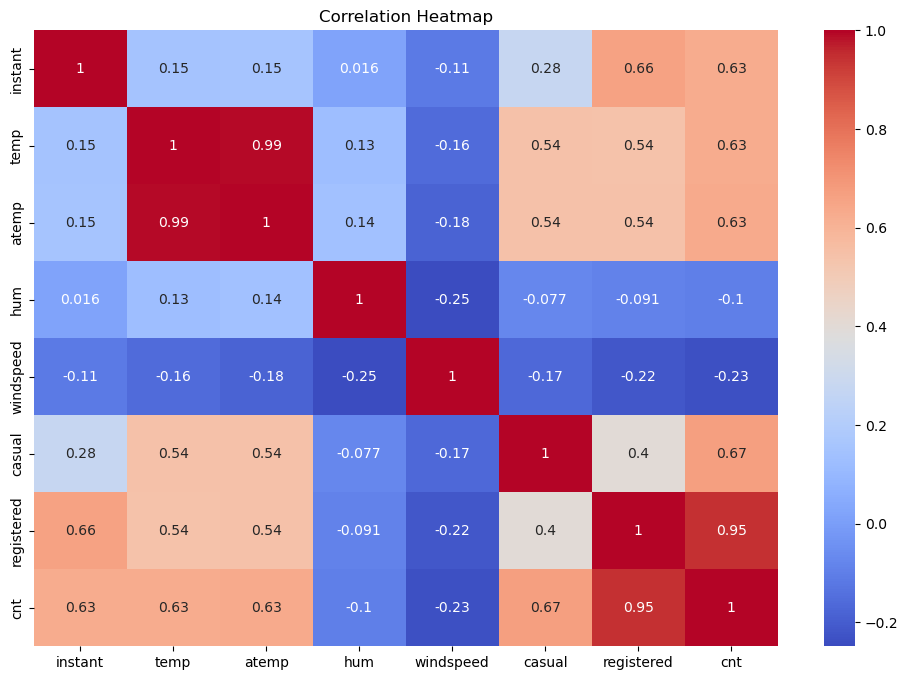

In [54]:
correlation_all = day_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

**Correlation Heatmap:**

There are strong positive correlations between cnt (total count) with registered (registered user count) and casual (casual user count), registered with casual, and temp (temperature) with atemp (apparent temperature), indicating that they tend to move in the same direction. There are also strong negative correlations between cnt with windspeed and hum (humidity), implying that days with higher windspeed and humidity tend to have fewer bike sharing counts.

In [3]:
day_df.to_csv("day_clean.csv", index=False)

## Visualization & Explanatory Analysis
In this step, we utilize various visualization methods such as plots, charts, and graphs to explore patterns, trends, and relationships within the bike sharing dataset. Through exploratory data analysis, we aim to provide meaningful interpretations and explanations that address the key business questions identified earlier in the project. 

### 1. What are the overall trends in bike sharing counts over the two-year period?

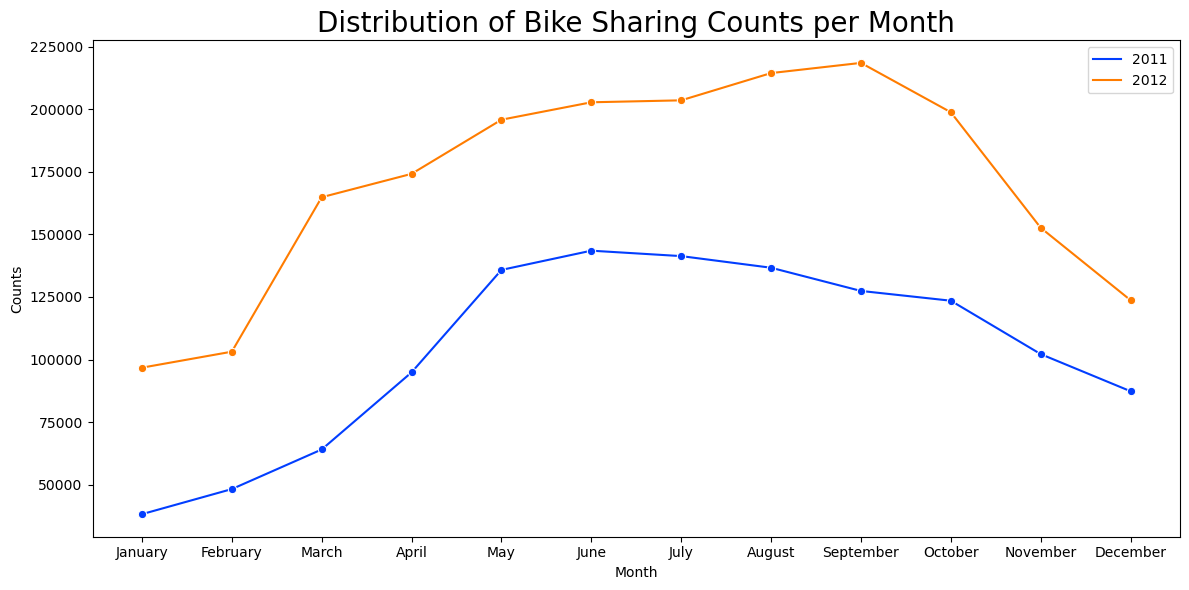

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_users_df,
    x="mnth",
    y="cnt",
    hue="yr",
    marker='o',
    palette="bright"
)
plt.title("Distribution of Bike Sharing Counts per Month", loc="center", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

- The bike sharing counts were generally higher in 2012 compared to 2011. 
- There is a clear seasonal pattern, with the highest ridership during the warmer months (April to September) and the lowest ridership during the colder months (November to March) likely due to factors such as weather conditions, with people being more likely to choose cycling in pleasant weather.

### 2. How does the distribution of bike sharing counts vary between weekdays, workingdays and holidays?

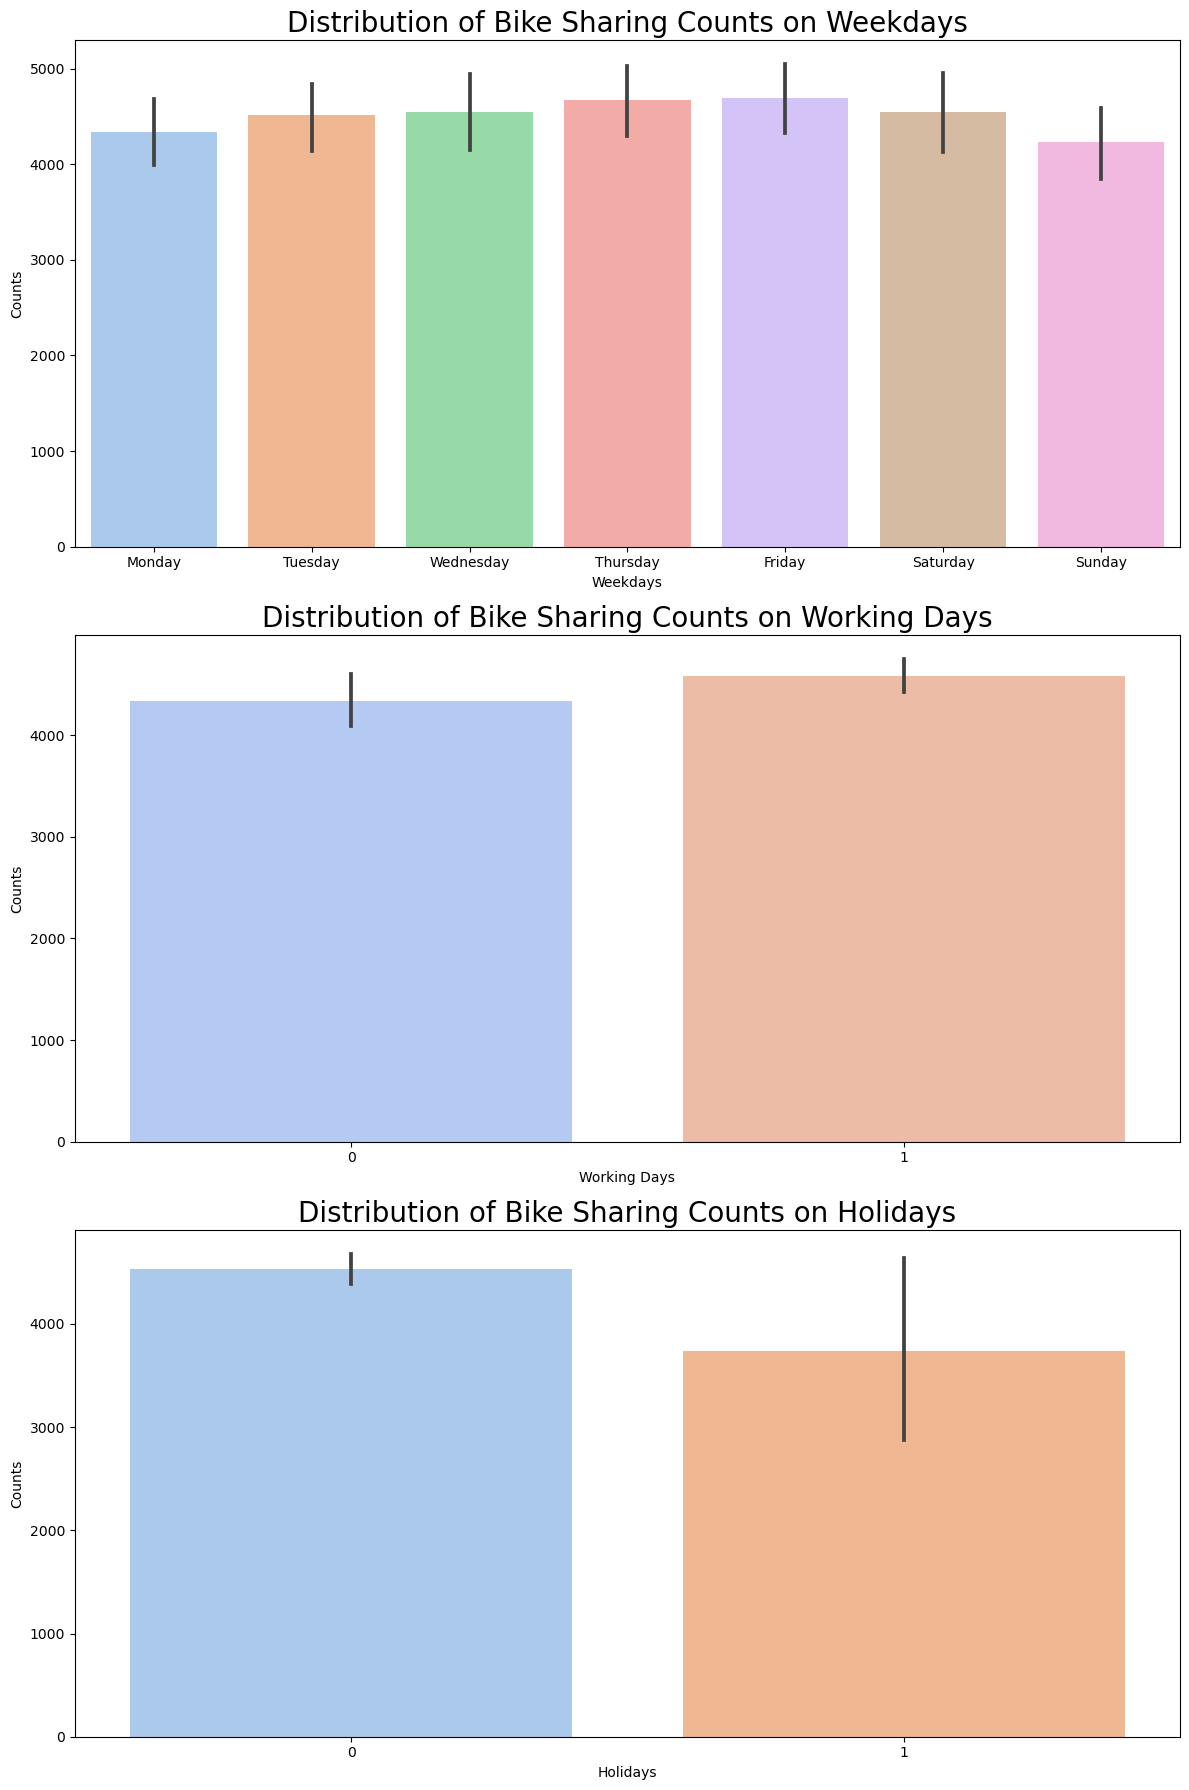

In [57]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(3, 1, figsize=(12,18))

# Bar plot for weekdays
sns.barplot(
    x="weekday",
    y="cnt",
    data=day_df,
    ax=axes[0],
    palette="pastel",
    order=day_order
)
axes[0].set_title('Distribution of Bike Sharing Counts on Weekdays', loc="center", fontsize=20)
axes[0].set_xlabel('Weekdays')
axes[0].set_ylabel('Counts')

# Bar plot for working days
sns.barplot(
    x="workingday",
    y="cnt",
    data=day_df,
    ax=axes[1],
    palette="coolwarm"
)
axes[1].set_title('Distribution of Bike Sharing Counts on Working Days', loc="center", fontsize=20)
axes[1].set_xlabel('Working Days')
axes[1].set_ylabel('Counts')

# Bar plot for holidays
sns.barplot(
    x="holiday",
    y="cnt",
    data=day_df,
    ax=axes[2],
    palette="pastel"
)
axes[2].set_title('Distribution of Bike Sharing Counts on Holidays', loc="center", fontsize=20)
axes[2].set_xlabel('Holidays')
axes[2].set_ylabel('Counts')

plt.tight_layout()
plt.show()

- Weekdays generally have a higher and more consistent distribution of bike sharing counts likely due to people using bikes for commuting purposes on weekdays with Fridays have the highest number of counts among weekdays, potentially reflecting the end of the workweek and increased leisure activities.
- Among working days, the number of counts follows a similar pattern attributed to people's work schedules and commuting patterns during the week.
- Holidays have the highest peak in counts but generally have lower overall counts compared to weekdays due to people using bikes for recreational purposes during holidays.

### 3. What is the impact of weather conditions on bike sharing counts?

In [58]:
weather_users_df = day_df.groupby("weathersit").agg({
    "cnt": "sum"
}).reset_index()
weather_users_df.head()

,weathersit,cnt
0,Clear/Partly Cloudy,2257952
1,Light Snow/Rain,37869
2,Misty/Cloudy,996858


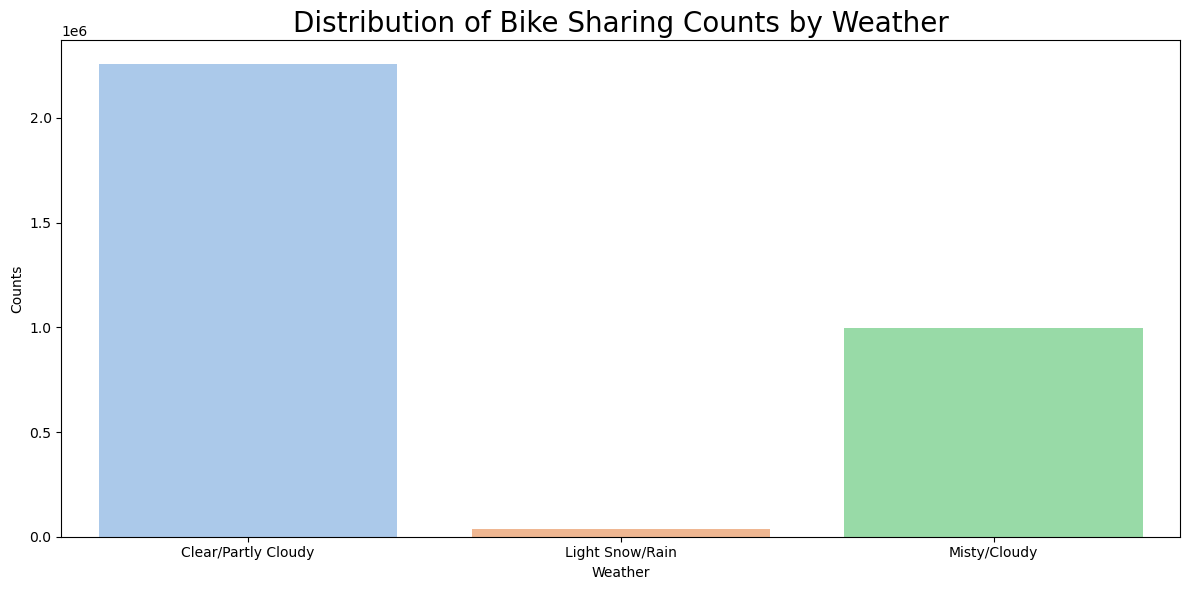

In [59]:
plt.figure(figsize=(12, 6))

sns.barplot(x="weathersit", y="cnt", data=weather_users_df, palette='pastel')
plt.xlabel('Weather')
plt.ylabel('Counts')
plt.title('Distribution of Bike Sharing Counts by Weather', loc="center", fontsize=20)

plt.tight_layout()
plt.show()

- Across all seasons, clear or partly cloudy days consistently have the highest number of bike sharing counts likely attributable to these weather conditions being generally considered pleasant and favorable for cycling.
- Compared to clear/partly cloudy days, days with light snow or rain consistently show a decrease in bike sharing counts across all seasons. This decrease is generally more pronounced in winter, where the drop in counts is substantial. 
- The impact of misty or cloudy days on bike sharing counts is more nuanced and varies across seasons due to the varying levels of visibility and precipitation associated with misty/cloudy conditions, which can be less impactful than light snow or rain, especially in colder months with harsher weather conditions.

### 4. What proportion of daily bike sharing counts are from registered users versus casual users?

In [60]:
daily_df = day_df.groupby('weekday')[['registered', 'casual', 'cnt']].sum().reset_index()
daily_df.head()

,weekday,registered,casual,cnt
0,Friday,409552,78238,487790
1,Monday,384719,70784,455503
2,Saturday,323955,153852,477807
3,Sunday,303506,140521,444027
4,Thursday,423935,61460,485395


In [61]:
daily_users_df = pd.melt(day_df, id_vars=['weekday'], value_vars=['registered', 'casual'], var_name='user_type', value_name='count')
daily_users_df.head()

,weekday,user_type,count
0,Saturday,registered,654
1,Sunday,registered,670
2,Monday,registered,1229
3,Tuesday,registered,1454
4,Wednesday,registered,1518


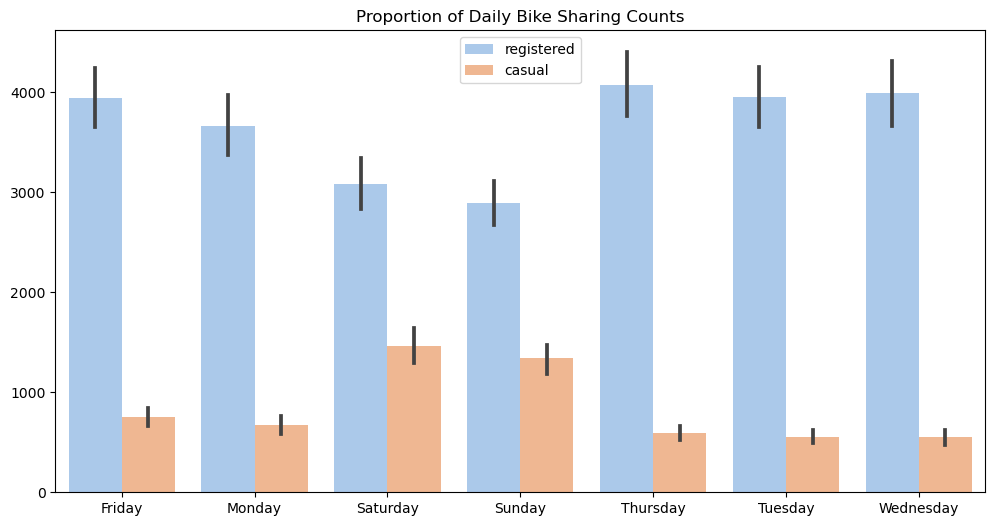

In [62]:
plt.figure(figsize=(12, 6))

sns.barplot(x='weekday', y='count', data=daily_users_df, hue='user_type', palette='pastel')

plt.title("Proportion of Daily Bike Sharing Counts")
plt.xlabel("")
plt.ylabel("")

plt.legend()
plt.show()

- Registered users contribute a higher proportion of daily bike sharing counts compared to casual users.
- The proportion of bike sharing counts from registered users consistently high across all days indicates that registered users are the dominant group utilizing the bike sharing service on a daily basis.
- Casual users contribute the remaining of daily bike sharing counts. While their ridership is lower than registered users, it still forms a significant portion of the overall bike-sharing activity.

### 5. Is there a noticeable impact of temperature, atemp, humidity and windspeed on bike sharing counts?

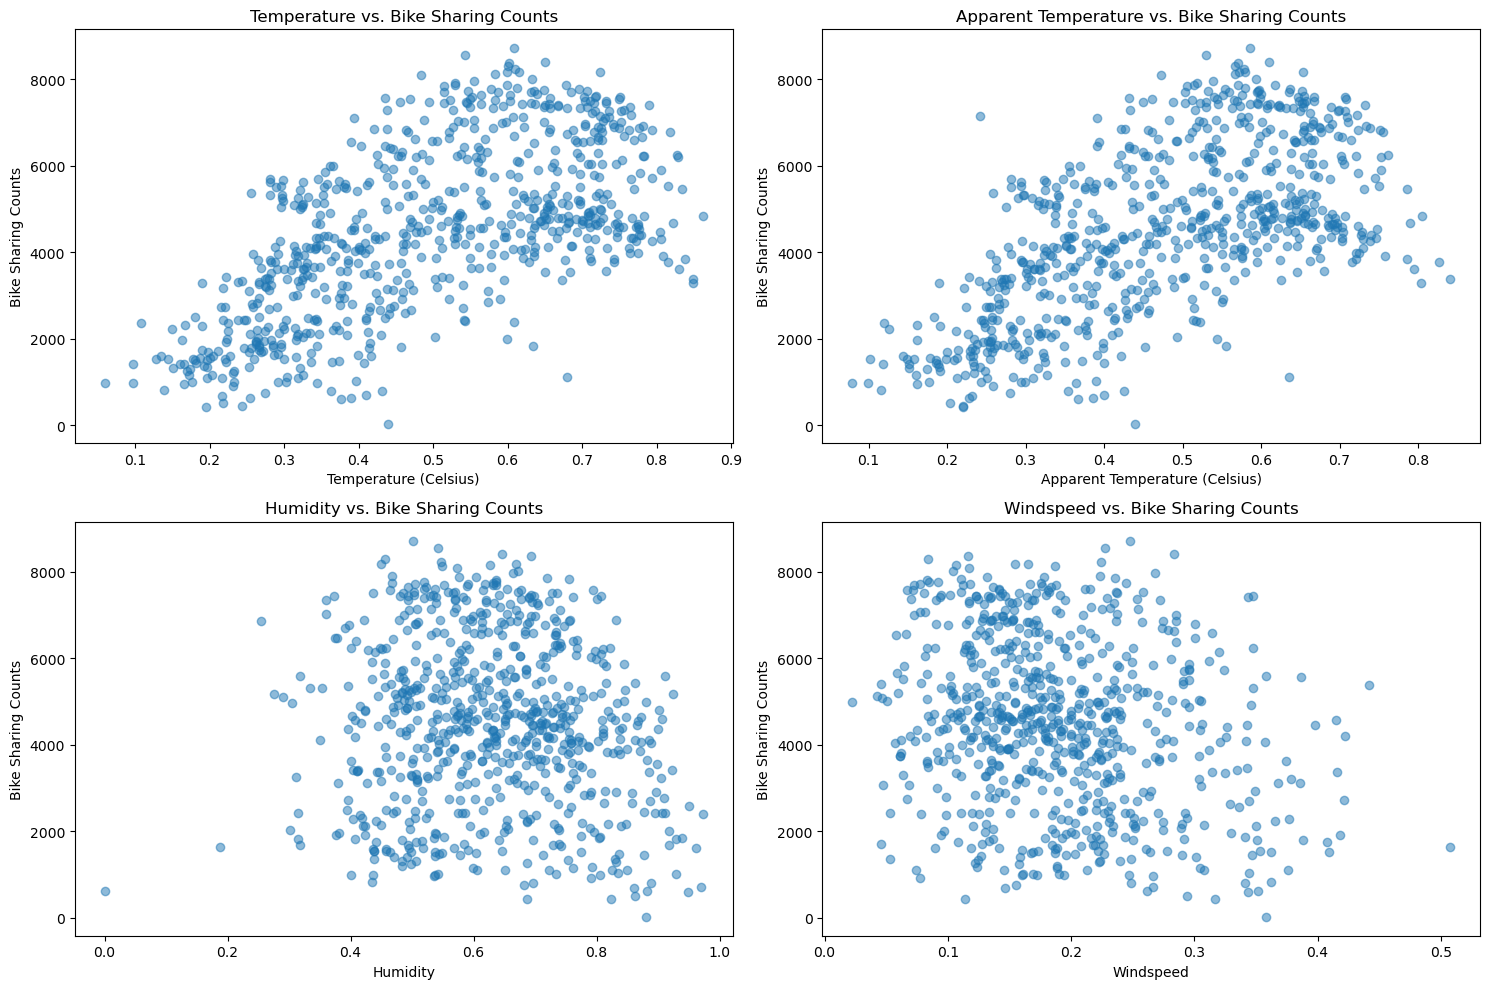

In [63]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(day_df['temp'], day_df['cnt'], alpha=0.5)
plt.title('Temperature vs. Bike Sharing Counts')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Sharing Counts')

plt.subplot(2, 2, 2)
plt.scatter(day_df['atemp'], day_df['cnt'], alpha=0.5)
plt.title('Apparent Temperature vs. Bike Sharing Counts')
plt.xlabel('Apparent Temperature (Celsius)')
plt.ylabel('Bike Sharing Counts')

plt.subplot(2, 2, 3)
plt.scatter(day_df['hum'], day_df['cnt'], alpha=0.5)
plt.title('Humidity vs. Bike Sharing Counts')
plt.xlabel('Humidity')
plt.ylabel('Bike Sharing Counts')

plt.subplot(2, 2, 4)
plt.scatter(day_df['windspeed'], day_df['cnt'], alpha=0.5)
plt.title('Windspeed vs. Bike Sharing Counts')
plt.xlabel('Windspeed')
plt.ylabel('Bike Sharing Counts')

plt.tight_layout()
plt.show()

- There is a moderate positive correlation between temperature and bike sharing counts. As the temperature increases, there is a tendency for the bike sharing counts to be higher.
- There appears to be a moderate positive correlation between apparent temperature and bike sharing counts. As the apparent temperature increases, there is an inclination for the bike sharing counts to be higher.
- There are a less clear relationship between humidity and bike sharing counts. It seems that the counts are slightly lower at higher humidity levels, indicating that humidity alone may not have a significant impact on bike sharing counts.
- There are not a strong relationship between windspeed and bike sharing counts. The points appear to be dispersed across different windspeed levels, suggesting that windspeed may not have a noticeable impact on the bike sharing counts. 

## Conclusion

**1. What are the overall trends in bike sharing counts over the two-year period?**

The overall trend in bike sharing counts over the two-year period suggests a growing popularity of bike sharing, evident through both seasonal fluctuations and a consistent upward trajectory year-over-year.

**2. How does the distribution of bike sharing vary between weekdays, workingdays and holidays?**

The distribution of bike sharing varies notably between weekdays, working days, and holidays. Weekdays, particularly Fridays, witness the highest rental volumes, indicating commuter usage. Working days generally have lower ridership, with weekends experiencing the least activity. Holidays show increased rentals, signaling a shift towards leisure-oriented bike usage.

**3. What is the impact of weather conditions on bike sharing counts?**

Weather conditions have a notable impact on bike sharing, with clear/partly cloudy days consistently fostering higher ridership across all seasons. Conversely, light snow/rain conditions correlate with decreased rentals, particularly in winter. The effect of misty/cloudy days is more variable, influenced by seasonal dynamics and specific weather patterns.

**4. What proportion of daily bike sharing are from registered users versus casual users?**

Registered users contribute a larger proportion of daily bike sharing counts compared to casual users, indicating their dominant role in utilizing the bike sharing service on a regular basis. Despite this, casual users still form a significant portion of the overall bike-sharing activity, highlighting the diversity in user demographics and usage patterns.

**5. Is there a noticeable impact of temperature, atemp, humidity and windspeed on bike sharing?**

Temperature and apparent temperature show a moderate positive correlation with bike sharing counts, suggesting increased activity with higher temperatures. Humidity and windspeed have less clear relationships with bike sharing counts, indicating their impact may be minimal. Overall, temperature and apparent temperature seem to have a more noticeable impact on bike sharing compared to humidity and windspeed